In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df['Current_Year'] = 2020

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [8]:
df['No of year'] = df['Current_Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No of year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [9]:
from sklearn.preprocessing import LabelEncoder

feat = ['Fuel_Type','Seller_Type','Transmission']

label = LabelEncoder()

for i in feat:
    df[i] = label.fit_transform(df[i])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No of year
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2020,6
1,sx4,2013,4.75,9.54,43000,1,0,1,0,2020,7
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2020,3
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,2020,9
4,swift,2014,4.60,6.87,42450,1,0,1,0,2020,6


In [10]:
df.drop('Current_Year',axis=1,inplace=True)
df.drop('Car_Name',axis=1,inplace=True)

In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No of year
0,2014,3.35,5.59,27000,2,0,1,0,6
1,2013,4.75,9.54,43000,1,0,1,0,7
2,2017,7.25,9.85,6900,2,0,1,0,3
3,2011,2.85,4.15,5200,2,0,1,0,9
4,2014,4.60,6.87,42450,1,0,1,0,6


In [12]:
# correlation 
corr_metrix = df.corr()

corr_metrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
No of year      -0.236141
Transmission    -0.367128
Fuel_Type       -0.509467
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64

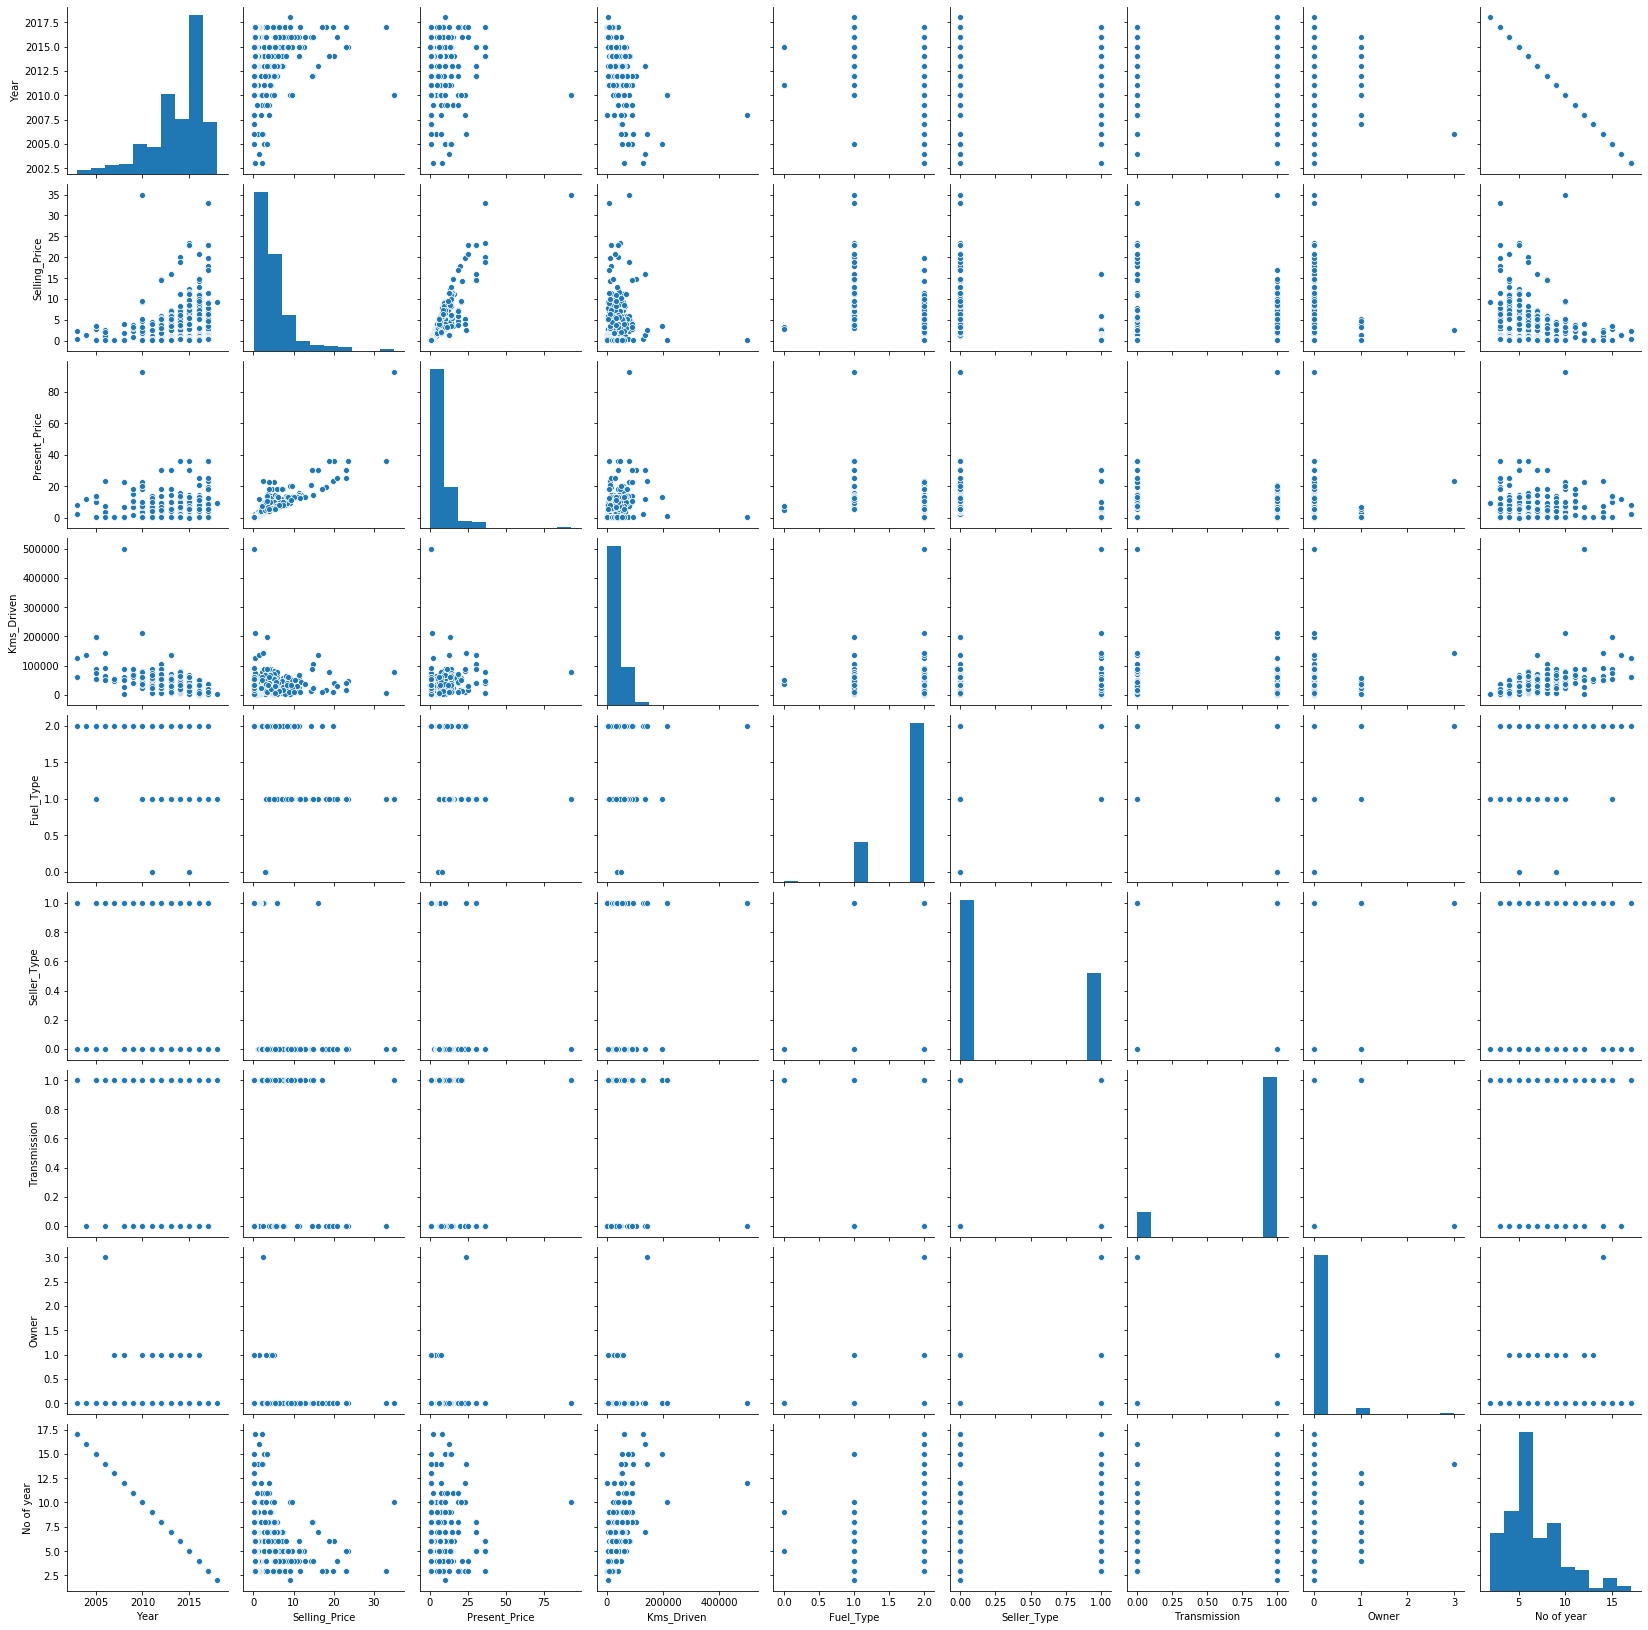

In [13]:
sns.pairplot(df)

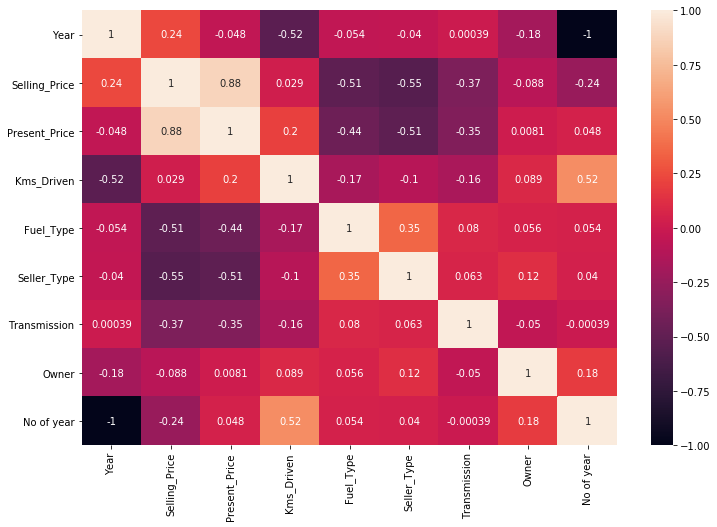

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [15]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale_feat = scale.fit_transform(df.drop('Selling_Price',axis=1))

scale_feat

array([[ 0.128897  , -0.23621461, -0.25622446, ...,  0.39148015,
        -0.17450057, -0.128897  ],
       [-0.21751369,  0.22150462,  0.1559105 , ...,  0.39148015,
        -0.17450057,  0.21751369],
       [ 1.16812909,  0.25742689, -0.77396901, ...,  0.39148015,
        -0.17450057, -1.16812909],
       ...,
       [-1.60315648,  0.39068691,  1.31334003, ...,  0.39148015,
        -0.17450057,  1.60315648],
       [ 1.16812909,  0.56450434, -0.7198763 , ...,  0.39148015,
        -0.17450057, -1.16812909],
       [ 0.8217184 , -0.20029235, -0.81095812, ...,  0.39148015,
        -0.17450057, -0.8217184 ]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_feat,df['Selling_Price'], test_size=0.33, random_state=42)

# LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'MAE -> {mean_absolute_error(y_test,prediction)}')
print(f'MSE -> {mean_squared_error(y_test,prediction)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,prediction))}')

print(f'Accuracy -> {r2_score(y_test,prediction)*100}')

MAE -> 1.2563641232242435
MSE -> 3.7578448245759466
RMSE -> 1.9385161398801782
Accuracy -> 85.95302518969878


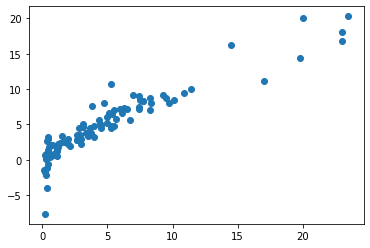

In [28]:
plt.scatter(y_test,prediction)

# Cross Validation Score

In [19]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator=lr,X=scale_feat,y=df['Selling_Price'],scoring='neg_mean_squared_error',cv=10)
score = np.sqrt(-score)

print(f'Score -> {score}')
print()
print(f'Mean -> {score.mean()}')
print()
print(f'Standard deviation -> {score.std()}')


Score -> [1.26619735 1.99342595 4.69265994 2.20280814 1.05420072 1.82539971
 2.58061706 1.3291069  0.90937292 0.92458014]

Mean -> 1.8778368826358076

Standard deviation -> 1.083468990004411


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf_predict = rf.predict(X_test)


print(f'MAE -> {mean_absolute_error(y_test,rf_predict)}')
print(f'MSE -> {mean_squared_error(y_test,rf_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,rf_predict))}')

print(f'Accuracy -> {r2_score(y_test,rf_predict)*100}')

MAE -> 0.6269220000000002
MSE -> 1.1694995730000002
RMSE -> 1.0814340354362812
Accuracy -> 95.62836364738855


# SVM

In [21]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)

print(f'MAE -> {mean_absolute_error(y_test,svm_predict)}')
print(f'MSE -> {mean_squared_error(y_test,svm_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,svm_predict))}')

print(f'Accuracy -> {r2_score(y_test,svm_predict)*100}')

MAE -> 1.3558348452524245
MSE -> 9.356736812592748
RMSE -> 3.0588783585806003
Accuracy -> 65.0241421749127


# Hypertuning GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svm,param_grid,verbose=3)

grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.063, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.153, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=-0.033, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.170, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.110, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.118, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.390, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.144, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.470, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.423, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.323, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.672, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.411, total=   0.0s
[CV] 

[CV] .................... C=100, gamma=0.1, score=0.920, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.950, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.893, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.931, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.964, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.932, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.981, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.8s finished


In [23]:

print(f'MAE -> {mean_absolute_error(y_test,grid_predict)}')
print(f'MSE -> {mean_squared_error(y_test,grid_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,grid_predict))}')

print(f'Accuracy -> {r2_score(y_test,grid_predict)*100}')

MAE -> 0.7015140610254383
MSE -> 1.2574588671734444
RMSE -> 1.121364734229432
Accuracy -> 95.29956827470424


In [24]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.01}


In [25]:
print(grid.best_score_)

0.9402267231518637
